> This is a rework of my task during Computer Vision class in 2022.

> Goal(s):
- to demonstrate face recognition for detecting characters with red faces.

> Reference(s):
1.  https://towardsdatascience.com/face-detection-with-haar-cascade-727f68dafd08
2.  https://prabhitha3.medium.com/face-detection-using-opencv-d71f78870271

# Import Library

In [1]:
import cv2
import matplotlib.pyplot as plt

# Image Preparation

In [2]:
def show_img(img, title, cmap=None):
  plt.imshow(img, cmap=cmap)
  plt.title(title)
  plt.axis('off')

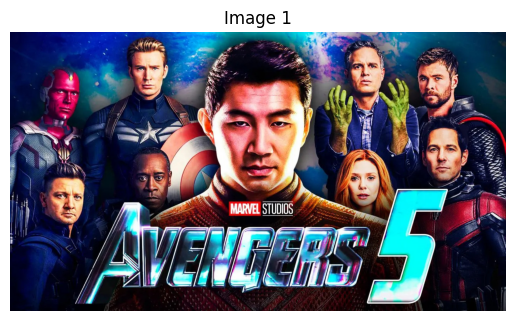

In [3]:
img = cv2.imread('dataset/face-detection/pict-1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_img(img, 'Image 1')

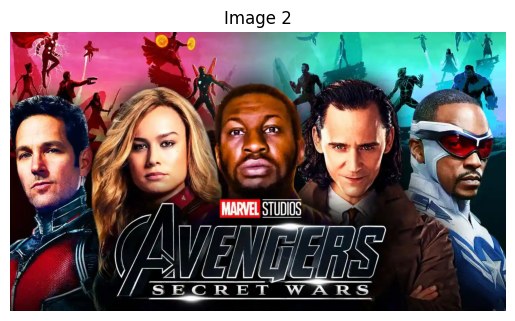

In [4]:
img_2 = cv2.imread('dataset/face-detection/pict-2.jpg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
show_img(img_2, 'Image 2')

# Face Detection

> Face Detection is a method for detecting faces, determining their location, or identifying their coordinates within an image, while Face Recognition is a method used to identify a person's identity using their face.

> There are several algorithms that can be used to detect faces in an image, including:
1.  Haar Cascade with OpenCV
2.  Histogram of Oriented Gradients with Dlib
3.  Convolutional Neural Networks with Dlib

> In this case, Face Detection will be performed using method number 1 , which is preferred due to familiarity with the OpenCV library. Additionally, since this task did not provide any specific requirements or conditions regarding how it needs to be executed, it can be assumed that as long as this method can fulfill the primary goals it will be suitable.

> Haar Cascade is a feature-based object detection algorithm designed to identify objects within images. This method was introduced by Paul Viola and Michael Jones in their 2001 paper titled `"Rapid Object Detection using a Boosted Cascade of Simple Features"` [1]. The algorithm operates by training a cascade function on numerous positive images (images containing the object of interest) and negative images (images without the object of interest). This training allows Haar Cascade to achieve a relatively high level of accuracy in object detection.

> The steps in the Haar Cascade algorithm are as follows:
1.  Haar Feature Selection
> Haar features are commonly used in face detection, particularly for identifying facial structures. For instance, the nose area is typically brighter than the eye area. The goal of this step is to find intensity differences by summing all pixel values in the black area and subtracting it from the sum of pixel values in the white area.
2.  Create Integral Image
> Calculating rectangle features using convolutional kernels can be computationally intensive. The purpose of creating an integral image is to enable the calculation of rectangular sums using just four values, significantly speeding up the process.
3.  Adaboost Training
> Not all parts of an image are relevant for classification. This step aims to select a small set of features and train classifiers on them. The AdaBoost algorithm is employed to identify features that minimize classification errors, thus refining the feature set from a large pool down to a more manageable size.
4. Cascading Classifiers
> The objective of this step is to reject sub-windows that do not contain the target image, thereby reducing false negatives. If the first classifier detects a positive result, the process continues to subsequent classifiers; however, if any classifier returns a negative result, that sub-window is discarded

> There are many pre-trained Haar Cascades available, which simplify the implementation of object detection tasks. Examples include Eye Detection, Human Face Detection, License Plate Detection, and more. In this context, the focus will be on using the Frontal Face Haar Cascade.

In [5]:
face_cascade = cv2.CascadeClassifier('dataset/haarcascades/haarcascade_frontalface_default.xml')

> In the process, images are converted to grayscale because the color information can increase complexity (a black-and-white/grayscale image has lower complexity than a color image in RGB/BGR or other formats). Therefore, to enhance the effectiveness of the algorithm, grayscaling is performed.

In [6]:
def find_face(img, label):
  faces = []
  detected_faces = face_cascade.detectMultiScale(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), scaleFactor=1.1, minNeighbors=5)
  img_result = img.copy()
  if (len(detected_faces) >= 1):
    for face in detected_faces:
      x, y, h, w = face
      face_img = img[y:y+h, x:x+w]
      img_result = cv2.rectangle(img_result, (x, y), (x+w, y+h), [255, 0, 0], 5)
      faces.append(face_img)
  show_img(img_result, label)
  return faces

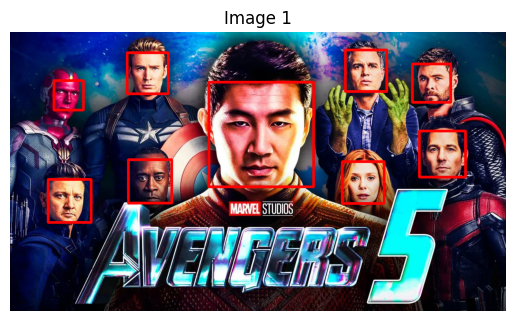

In [7]:
face_result = find_face(img, 'Image 1')

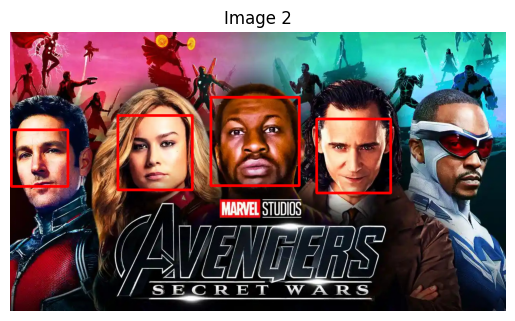

In [8]:
face_result_2 = find_face(img_2, 'Image 2')

> In the first image, 9 face images were detected, while in the second image, 4 face images were detected (the rightmost face image was not detected).

# Red Colored Face Detection

> Lower and upper bounds are selected as color boundaries. HSV is used to facilitate color segmentation. The details of HSV in OpenCV are as follows:
1.  Hue: Represents color (range: 0 - 179)
2.  Saturation: Represents intensity (range: 0 - 255)
3.  Value: Represents brightness (range: 0 - 255)

> Range Hue on OpenCV:

> 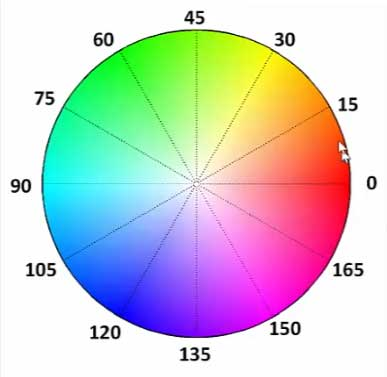

> After the detected face image is converted to HSV, the inRange function is used according to the predefined lower bound and upper bound. Pixels that fall within the range of the lower and upper bounds are turned white, while pixels that do not fall within this range are turned black. Then, if the number of white pixels from the previous result exceeds a threshold (half of the size of the face image), the face image is considered to be red.

In [9]:
def find_red_face(faces, label):
  lb = (165, 50, 50)
  ub = (180, 255, 255)
  idx = 0
  for face in faces:
    face_hsv = cv2.cvtColor(face, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(face_hsv, lb, ub)
    white_pixels = cv2.countNonZero(mask)
    if (white_pixels > (face.shape[0] * face.shape[1] / 2)):
      idx += 1
      show_img(face, label + f' ({idx})')

  if (idx == 0):
    print(f'No red faces are found in this image ({label}).')
  else:
    print(f'There are {idx} red face(s) found in this image ({label}).')

There are 1 red face(s) found in this image (Image 1).


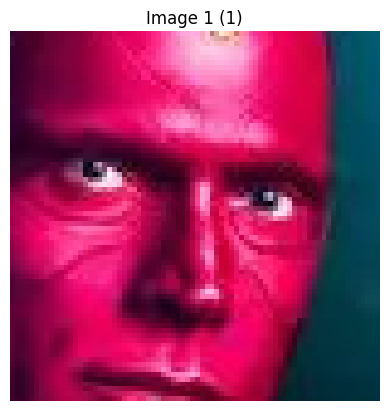

In [10]:
find_red_face(face_result, 'Image 1')

In [11]:
find_red_face(face_result_2, 'Image 2')

No red faces are found in this image (Image 2).
